K-means clustering is one of the simplest and popular unsupervised machine learning algorithms.A cluster refers to a collection of data points aggregated together because of certain similarities.A centroid is the imaginary or real location representing the center of the cluster.Every data point is allocated to each of the clusters through reducing the in-cluster sum of squares.In other words, the K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible.The ‘means’ in the K-means refers to averaging of the data; that is, finding the centroid

In [17]:
#IMPORTNG ESSENTIAL PACKAGES
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

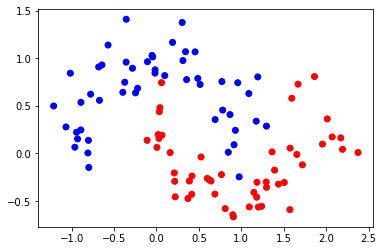

In [18]:
#2D - PLOTS
x_train, y_train = make_moons(noise=0.2)
x_valid, y_valid = make_moons(noise=0.2)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')

#TRYING WITH k=3 AND OBSERVING THE DATA

In [19]:
#TRYING WITH 3 AND OBSERVING THE DATA
k = 3
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)
print(kmeans.cluster_centers_)
print(kmeans.predict(x_train))

[[ 1.62910129  0.19513375]
 [-0.28674651  0.64052175]
 [ 0.76627564 -0.21965557]]
[0 1 2 1 1 2 0 2 1 0 2 1 2 2 2 1 1 1 2 2 1 0 0 1 1 2 1 1 1 1 1 2 0 1 0 2 1
 1 2 2 2 1 2 0 1 2 2 1 0 2 1 1 0 1 2 1 0 0 1 0 1 2 0 1 1 2 1 1 0 1 2 2 1 1
 1 1 1 2 1 2 0 2 2 2 0 1 0 1 2 0 1 0 1 2 2 2 1 0 0 1]


In [20]:
x0_values = np.linspace(-1.5, 2.5, 100)
x1_values = np.linspace(-1, 1.5, 100)
coords = np.asarray(np.meshgrid(x0_values, x1_values)).T.reshape(-1,2)
coords

array([[-1.5       , -1.        ],
       [-1.5       , -0.97474747],
       [-1.5       , -0.94949495],
       ...,
       [ 2.5       ,  1.44949495],
       [ 2.5       ,  1.47474747],
       [ 2.5       ,  1.5       ]])

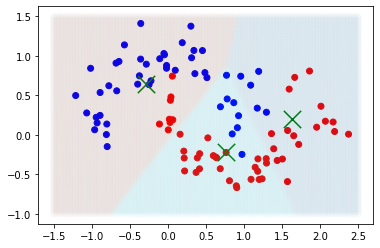

In [21]:
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='g', marker='x', s=300)
plt.scatter(coords[:,0], coords[:,1], c=kmeans.predict(coords), cmap='tab10',alpha=0.02) 

In [22]:
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label
cluster_y

{0: 1, 1: 0, 2: 1}

In [23]:
preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
train_acc = accuracy_score(y_train, preds_train)

preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
valid_acc = accuracy_score(y_valid, preds_valid)

print(train_acc, valid_acc)

0.79 0.82


#Accuracy of training and testing sample = 0.8, 0.79

In [24]:
for k in range(2, 20):
    # Do clustering
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x_train)
    
    # Map which label each cluster is 
    cluster_y = {}
    for i in range(k):
        counts = Counter(y_train[kmeans.labels_==i])
        label = counts.most_common()[0][0]
        cluster_y[i] = label
    
    # Evaluate results
    preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
    train_acc = accuracy_score(y_train, preds_train)

    preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
    valid_acc = accuracy_score(y_valid, preds_valid)

    print(k, train_acc, valid_acc)

2 0.78 0.77
3 0.79 0.82
4 0.8 0.84
5 0.85 0.87
6 0.96 0.97
7 0.96 0.97
8 0.98 0.97
9 0.97 0.96
10 0.97 0.96
11 0.97 0.97
12 0.96 0.96
13 0.98 0.96
14 0.98 0.97
15 0.97 0.97
16 0.96 0.97
17 0.98 0.98
18 0.95 0.94
19 0.97 0.97


Do clustering k =4

In [25]:

k = 4
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)

# Map which label each cluster is 
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label

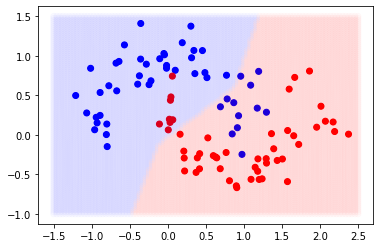

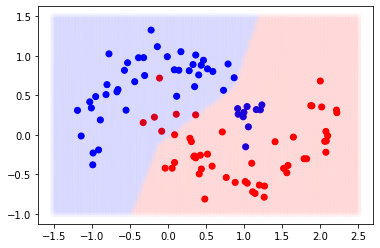

In [26]:
preds_coords = [cluster_y[el] for el in kmeans.predict(coords)]
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)
plt.show()

plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)
plt.show()

In [27]:
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label
cluster_y

{0: 0, 1: 1, 2: 0, 3: 1}

In [33]:
preds_train = [cluster_y[el] for el in kmeans.predict(x_train)]
train_acc = accuracy_score(y_train, preds_train)

preds_valid = [cluster_y[el] for el in kmeans.predict(x_valid)]
valid_acc = accuracy_score(y_valid, preds_valid)

print(train_acc, valid_acc)

0.96 0.97


#Accuracy when K = 4  0.97%

In [34]:
# Do clustering
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(x_train)

# Map which label each cluster is 
cluster_y = {}
for i in range(k):
    counts = Counter(y_train[kmeans.labels_==i])
    label = counts.most_common()[0][0]
    cluster_y[i] = label

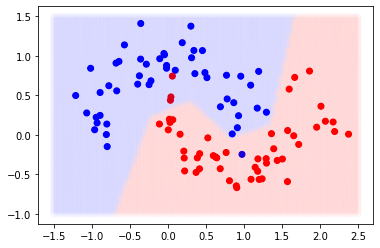

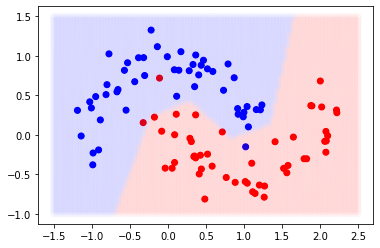

In [35]:
preds_coords = [cluster_y[el] for el in kmeans.predict(coords)]
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)
plt.show()

plt.scatter(x_valid[:,0], x_valid[:,1], c=y_valid, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.02)

0.98


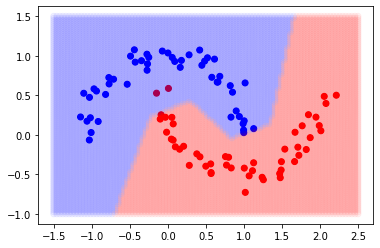

In [36]:
x_test, y_test = make_moons(noise=0.1)
preds_test = [cluster_y[el] for el in kmeans.predict(x_test)]
test_acc = accuracy_score(y_test, preds_test)
print(test_acc)
plt.scatter(x_test[:,0], x_test[:,1], c=y_test, cmap='bwr')
plt.scatter(coords[:,0], coords[:,1], c=preds_coords, cmap='bwr', alpha=0.05)

#TRIED THE MODEL WITH MULTIPLE VALUES OF K, BUT THE BEST ONE IS WHEN K = 6 WITH 98% ACCURACY